## Compare two transformation method on the IRIS data set: 

  - Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

  - Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance *between classes*. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.


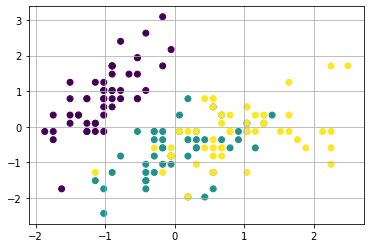

In [1]:
%matplotlib inline
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris as load
from sklearn.preprocessing import StandardScaler

# Load data
X, y = load(return_X_y=True) # load_iris(return_X_y=True)
sc = StandardScaler()
X = sc.fit_transform(X)

# Plot data
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid()

We apply PCA and LDA (a.k.a Fisher Discriminative Analysis) to the data sets, and plot the cummulative variance

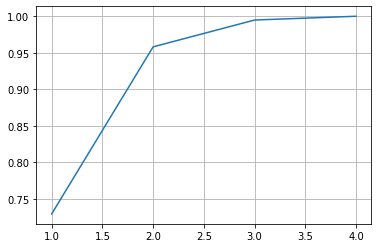

In [2]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
l = pca.explained_variance_
plt.plot(range(1,X.shape[1]+1), l.cumsum()/l.sum())
plt.grid()

We can map the data on the first two pcs

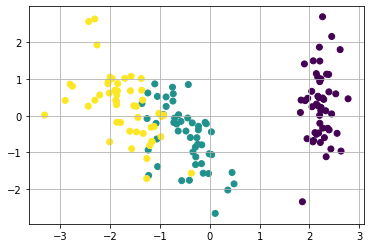

In [3]:
Xp = pca.transform(X) # linear projection along the axes that maximize the dispersion (variance) 
plt.scatter(-Xp[:,0], Xp[:,1],c=y) # plot the 2 first components
plt.grid()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X, y)
l = lda.explained_variance_ratio_
plt.plot(range(1,X.shape[1]-1),l.cumsum()/l.sum())
plt.grid()

Remember that in LDA we assume that all classes have the same estimated covariance. Thus we can rescale the data so that this covariance is the identity. Then one can show that to classify a data point after scaling is equivalent to finding the estimated class mean which is closest to the data point in the Euclidean distance (see course). But this can be done just as well after projecting on the affine subspace generated by all the (rescaled) means for all classes. 

This shows that, implicit in the LDA classifier, there is a *dimensionality reduction by linear projection onto a $K-1$ dimensional space*, where $K$ is the total number of target classes. 

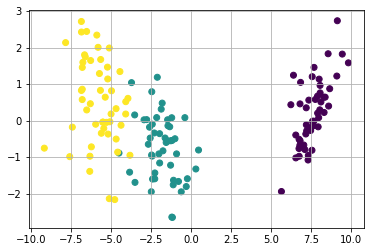

In [5]:
Xp = lda.transform(X) # linear projection to maximize class separation for the fitted LDA model 
plt.scatter(Xp[:,0], Xp[:,1],c=y)
plt.grid()

### Exercice
- Explain why the explained variance ratio is 1 for the LDA with two components
- Compare the results of PCA and LDA. What can we conclude for PCA?